## Data Loading

In [1]:
# Import necessary dependecies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Filter the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set up the data path

TRAIN_DATA_PATH = "./data/train.csv"
TEST_DATA_PATH = "./data/test.csv"

In [3]:
# Load the data as Pandas DataFrame

train_df = pd.read_csv(TRAIN_DATA_PATH)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Number of rows and columns

train_df.shape

(891, 12)

In [5]:
# Info about dataset columns

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Some descriptive statistical information

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Missing values in the data

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Percentage % of null values in Age column

age_null_percentage = (train_df['Age'].isnull().sum() / len(train_df['Age'])) * 100
print(f"Percentage of null values in 'Age' column: {age_null_percentage:.2f}%")

Percentage of null values in 'Age' column: 19.87%


In [9]:
# Percentage % of null values in Cabin column

cabin_null_percentage = (train_df['Cabin'].isnull().sum() / len(train_df['Cabin'])) * 100
print(f"Percentage of null values in 'Cabin' column: {cabin_null_percentage:.2f}%")

Percentage of null values in 'Cabin' column: 77.10%


**Observation:** Since there are 77% of missing values in the `Cabin` column, it would be better to drop them. I would also drop other unrequired columns like `PassengerId`, 'Name', and `Ticket`. These are unique for each record, so we don't need them.

In [10]:
# Drop unrequired columns

train_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [11]:
# Duplicated values in the data

train_df.duplicated().sum()

111

In [12]:
train_df.drop_duplicates(inplace=True)

In [13]:
train_df.duplicated().sum()

0

## Exploratory Data Analysis

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  780 non-null    int64  
 1   Pclass    780 non-null    int64  
 2   Sex       780 non-null    object 
 3   Age       676 non-null    float64
 4   SibSp     780 non-null    int64  
 5   Parch     780 non-null    int64  
 6   Fare      780 non-null    float64
 7   Embarked  778 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.8+ KB


In [15]:
sns.set_style('darkgrid') # Set Seaborn style to 'darkgrid'.
matplotlib.rcParams['font.size'] = 14 # Set default font size to 14.
matplotlib.rcParams['figure.figsize'] = (9, 5) # Set default figure size (9x5 inches).
matplotlib.rcParams['figure.facecolor'] = '#00000000' # Set figure background color to fully transparent.

### 1. Univariate Analysis

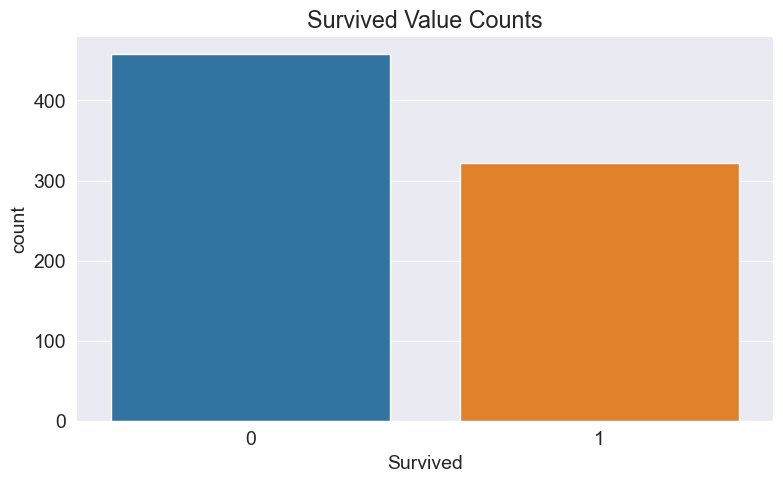

In [16]:
plt.title("Survived Value Counts")
sns.countplot(data=train_df, x="Survived");

**Observation:** The survival count is less than the unsurvived count, which means the dataset is unbalanced.

In [17]:
train_df.Pclass.value_counts()

Pclass
3    404
1    212
2    164
Name: count, dtype: int64

**Observation:** It looks like `Pclass` is a categorical feature.

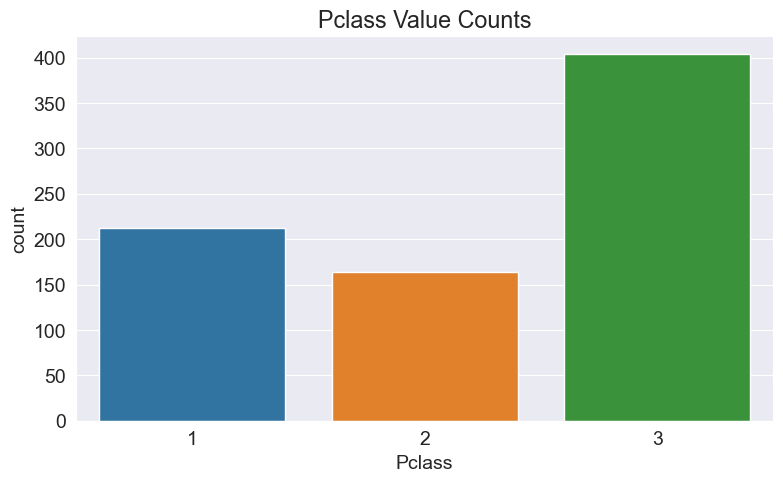

In [18]:
plt.title("Pclass Value Counts")
sns.countplot(data=train_df, x="Pclass");

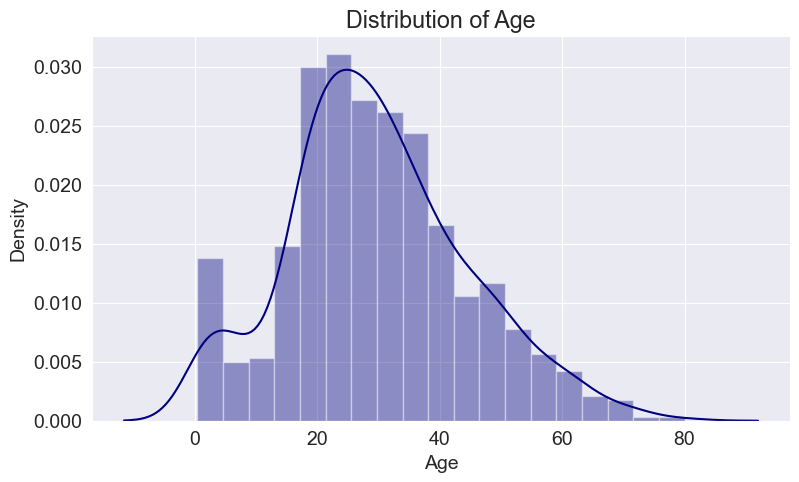

In [19]:
plt.title("Distribution of Age")
sns.distplot(train_df.Age, color="navy");

**Observation:** It looks a little skewered; we might want to transform it.

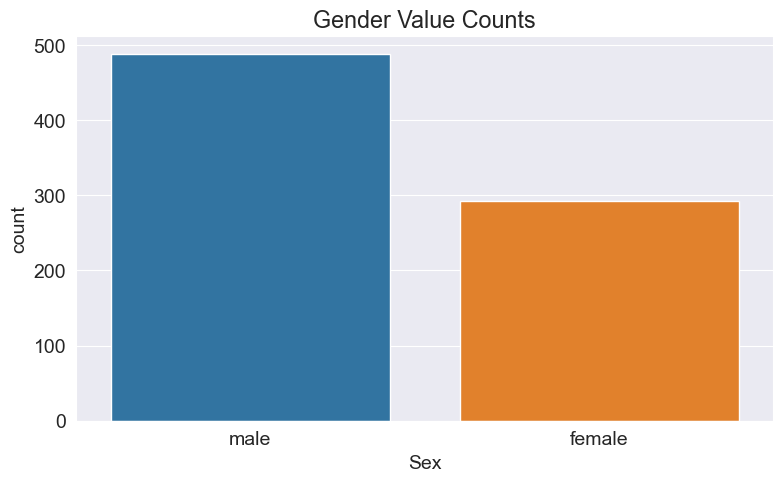

In [20]:
plt.title("Gender Value Counts")
sns.countplot(data=train_df, x="Sex");

In [21]:
train_df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [22]:
train_df.SibSp.value_counts()

SibSp
0    513
1    201
2     27
4     18
3     14
5      5
8      2
Name: count, dtype: int64

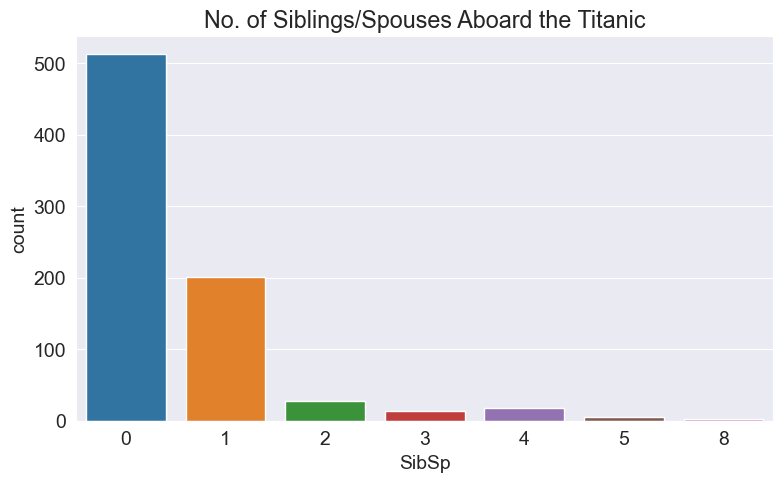

In [23]:
plt.title("No. of Siblings/Spouses Aboard the Titanic")
sns.countplot(data=train_df, x="SibSp");

In [24]:
train_df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [25]:
train_df.Parch.value_counts()

Parch
0    576
1    114
2     75
5      5
3      5
4      4
6      1
Name: count, dtype: int64

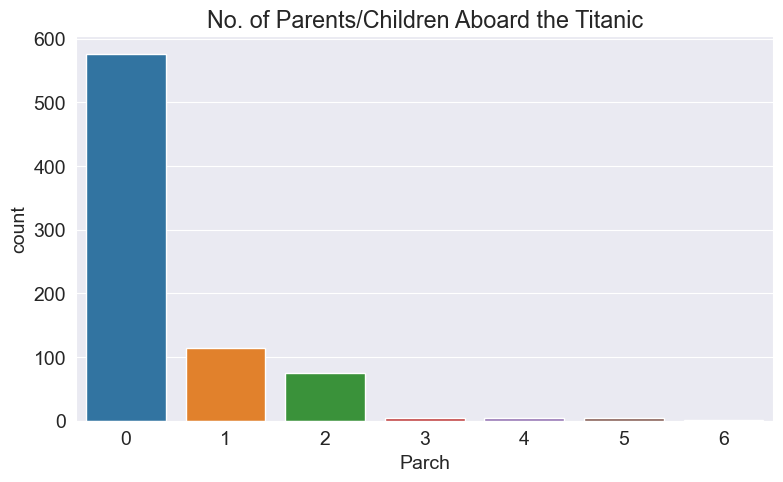

In [26]:
plt.title("No. of Parents/Children Aboard the Titanic")
sns.countplot(data=train_df, x="Parch");

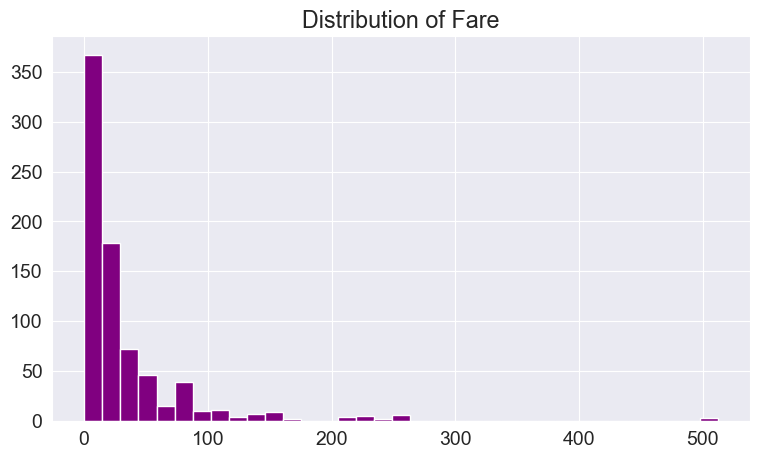

In [27]:
plt.title("Distribution of Fare")
plt.hist(data=train_df, x="Fare", color='purple', bins=35);

In [28]:
train_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [29]:
train_df.Embarked.value_counts()

Embarked
S    565
C    155
Q     58
Name: count, dtype: int64

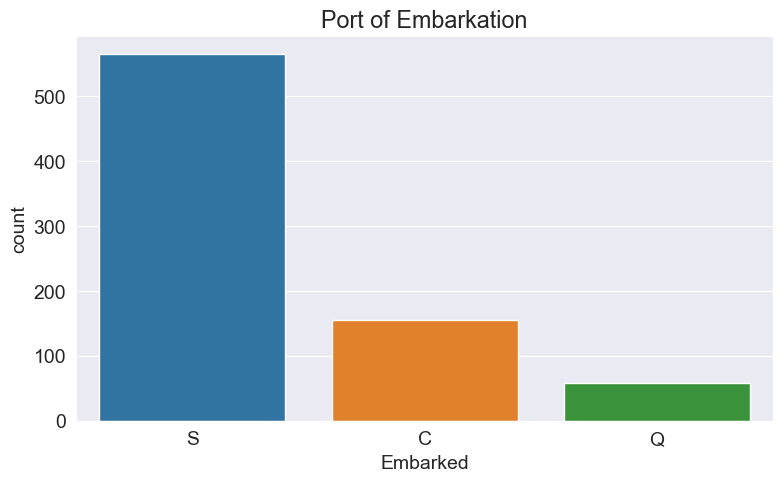

In [30]:
plt.title("Port of Embarkation")
sns.countplot(data=train_df, x='Embarked');

* Q = Queenstown
* S = Southampton
* C = Cherbourg

### 2. Bivariate Analysis

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  780 non-null    int64  
 1   Pclass    780 non-null    int64  
 2   Sex       780 non-null    object 
 3   Age       676 non-null    float64
 4   SibSp     780 non-null    int64  
 5   Parch     780 non-null    int64  
 6   Fare      780 non-null    float64
 7   Embarked  778 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.8+ KB


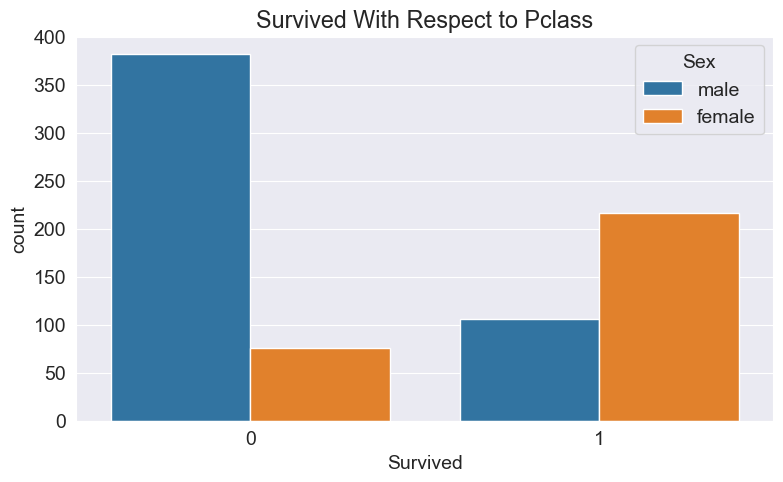

In [32]:
plt.title("Survived With Respect to Pclass")
sns.countplot(data=train_df, x="Survived", hue="Sex");

In [33]:
copy_df = train_df.copy()
copy_df['Survived'] = copy_df['Survived'].astype(str)
copy_df['Survived'].dtype

dtype('O')

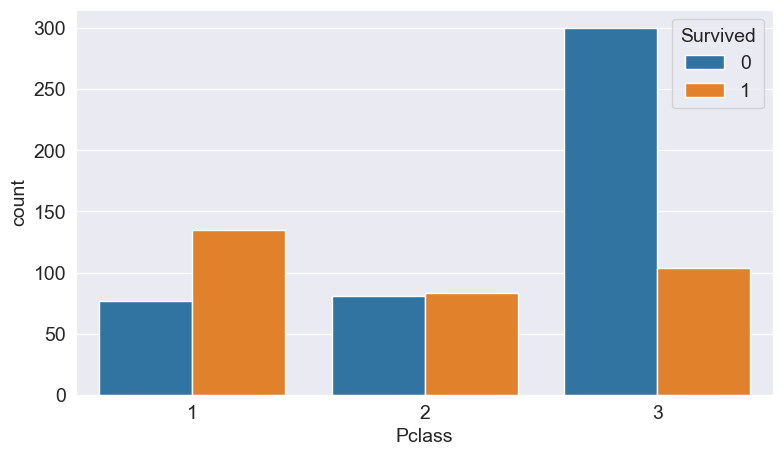

In [34]:
sns.countplot(data=copy_df, x="Pclass", hue="Survived");

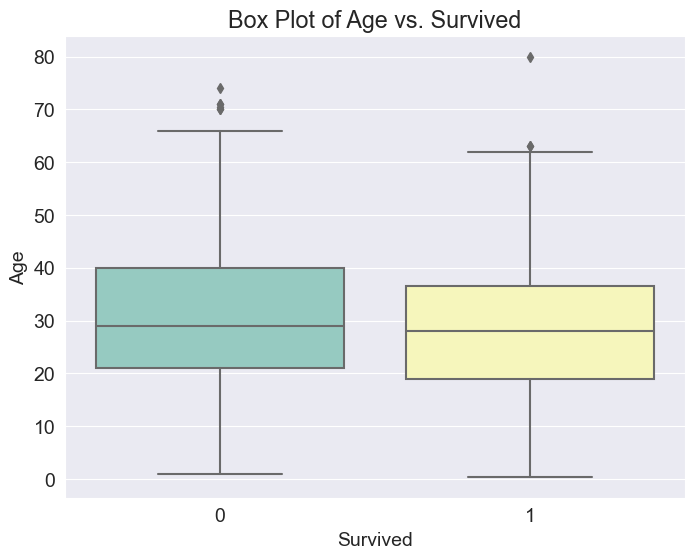

In [35]:
# Create a box plot

plt.figure(figsize=(8, 6))
sns.boxplot(x="Survived", y="Age", data=copy_df, palette="Set3")
plt.title("Box Plot of Age vs. Survived");

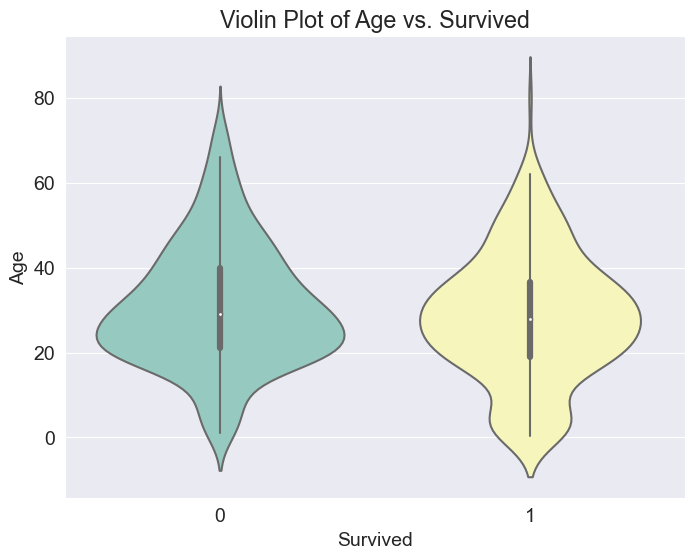

In [36]:
# Create a violin plot

plt.figure(figsize=(8, 6))
sns.violinplot(x="Survived", y="Age", data=copy_df, palette="Set3")
plt.title("Violin Plot of Age vs. Survived");

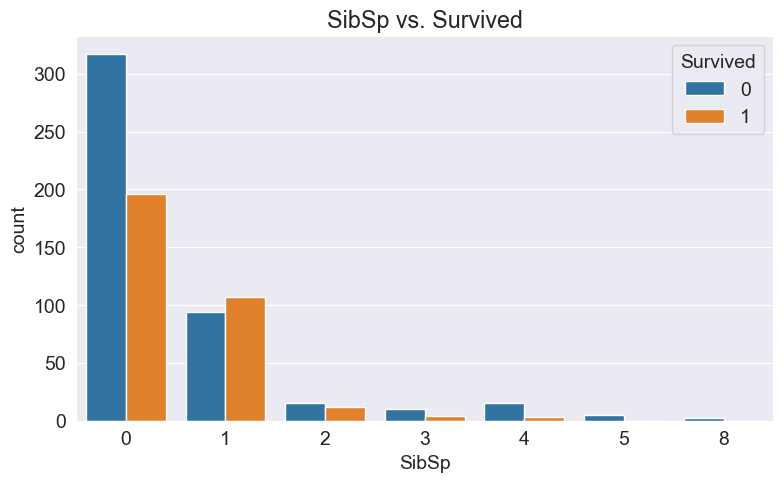

In [37]:
plt.title("SibSp vs. Survived")
sns.countplot(data=copy_df, x="SibSp", hue="Survived");

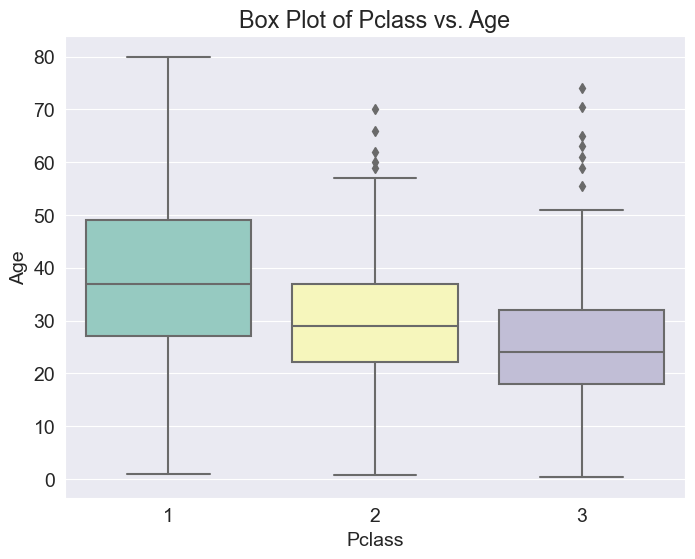

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Pclass", y="Age", data=copy_df, palette="Set3")
plt.title("Box Plot of Pclass vs. Age");

## Data Preprocessing

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  780 non-null    int64  
 1   Pclass    780 non-null    int64  
 2   Sex       780 non-null    object 
 3   Age       676 non-null    float64
 4   SibSp     780 non-null    int64  
 5   Parch     780 non-null    int64  
 6   Fare      780 non-null    float64
 7   Embarked  778 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.8+ KB


In [40]:
train_df.Age.mean()

29.81275147928994

In [41]:
def data_preprocessing(df):
    # Drop specified columns
    columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
    df = df.drop(columns=columns_to_drop, errors='ignore')
    
    # Replace categorical values with numerical values
    df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)
    
    # Fill missing values
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    
    return df

In [42]:
train_transformed = data_preprocessing(train_df)

In [43]:
train_transformed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [44]:
train_transformed.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [45]:
train_transformed.shape

(780, 8)

In [46]:
X = train_transformed.drop("Survived", axis=1)
Y = train_transformed["Survived"]

In [47]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0.0
1,1,1,38.000000,1,0,71.2833,1.0
2,3,1,26.000000,0,0,7.9250,0.0
3,1,1,35.000000,1,0,53.1000,0.0
4,3,0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
885,3,1,39.000000,0,5,29.1250,2.0
887,1,1,19.000000,0,0,30.0000,0.0
888,3,1,29.812751,1,2,23.4500,0.0
889,1,0,26.000000,0,0,30.0000,1.0


In [48]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 780, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [50]:
print(f"Shape of the entire dataset (X): {X.shape}")
print(f"Shape of the training dataset (X_train): {X_train.shape}")
print(f"Shape of the testing dataset (X_test): {X_test.shape}")

Shape of the entire dataset (X): (780, 7)
Shape of the training dataset (X_train): (624, 7)
Shape of the testing dataset (X_test): (156, 7)


## Model Training

### 1. Baseline Model

In [51]:
# LR = LogisticRegression()

In [52]:
# LR.fit(X_train, Y_train)

In [53]:
# # accuracy on training data
# X_train_pred = LR.predict(X_train)

# training_accuracy = accuracy_score(Y_train, X_train_pred)
# print('Accuracy score of training data: ', training_accuracy)

In [54]:
# # accuracy on test data
# X_test_pred = LR.predict(X_test)

# test_accuracy = accuracy_score(Y_test, X_test_pred)
# print('Accuracy score of test data: ', test_accuracy)

### 2. Hyperparameter Tuning

In [55]:
# Define the hyperparameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization penalty
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga'],  # Optimization solver
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(
    logistic_regression,  # The model to tune
    param_grid=param_grid,  # The hyperparameter grid
    cv=10,  # 5-fold cross-validation
    scoring='accuracy',  # Use accuracy as the evaluation metric
    n_jobs=-1  # Use all available CPU cores
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: {:.2f}%".format(grid_search.best_score_ * 100))

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Best Hyperparameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score: 77.23%
Test Accuracy: 80.77%


In [56]:
y_pred = best_model.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        91
           1       0.81      0.71      0.75        65

    accuracy                           0.81       156
   macro avg       0.81      0.79      0.80       156
weighted avg       0.81      0.81      0.81       156



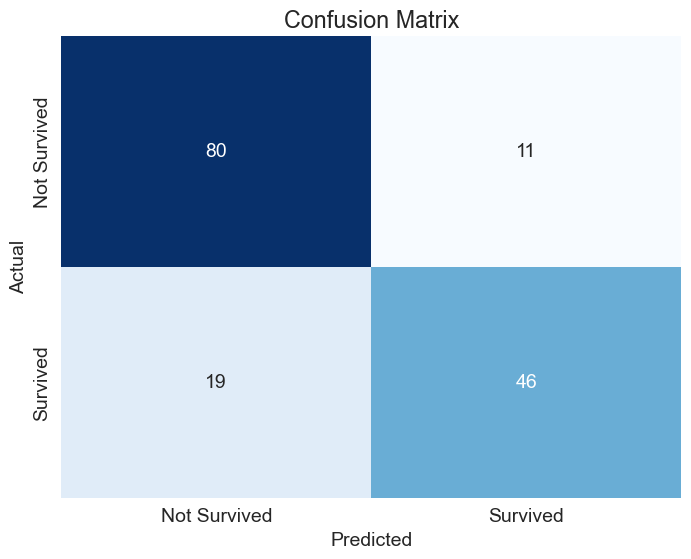

In [58]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix');

In [59]:
import pickle

# Serialize and save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
    
# Serialize and save the preprocessing fuction to a file
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(data_preprocessing, file)